In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


PROC_DIR = Path("../data/processed")
TABLES   = [
    "users", "user_surveys", "user_genre_preferences", "songs",
    "artists", "song_instruments", "instrument_popularity", "listening_history"
]

def load_csv(name):
    for suffix in ("_cleaned.csv", ".csv"):
        p = PROC_DIR / f"{name}{suffix}"
        if p.exists():
            return pd.read_csv(p)
    raise FileNotFoundError(f"No CSV found for {name} in {PROC_DIR}")


In [9]:
users                  = load_csv("users")
user_surveys           = load_csv("user_surveys")
user_genre_prefs       = load_csv("user_genre_preferences")
songs                  = load_csv("songs")
artists                = load_csv("artists")
song_instruments       = load_csv("song_instruments")
listening_history      = load_csv("listening_history")

# parse timestamps
if "listen_timestamp" in listening_history:
    listening_history["listen_timestamp"] = pd.to_datetime(
        listening_history["listen_timestamp"], errors="coerce"
    )
if "survey_date" in user_surveys:
    user_surveys["survey_date"] = pd.to_datetime(
        user_surveys["survey_date"], errors="coerce"
    )


/tmp/ipykernel_61174/1784860760.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


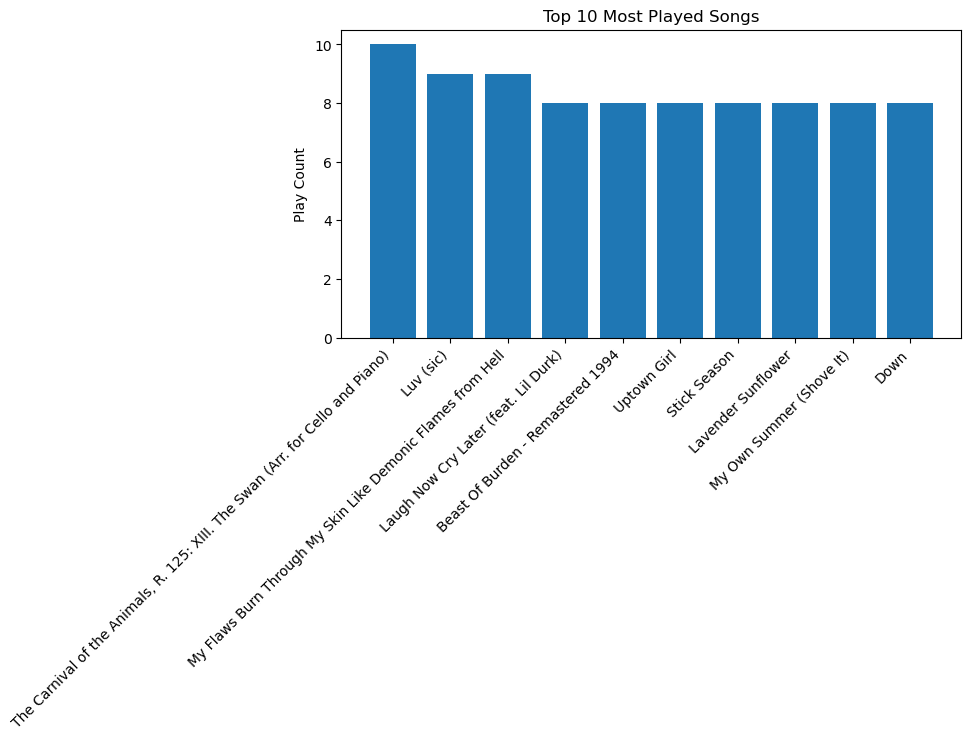

In [10]:
top10 = listening_history["song_id"].value_counts().head(10)
titles = songs.set_index("song_id").loc[top10.index]["title"]

plt.figure(figsize=(8,4))
plt.bar(titles, top10.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Play Count")
plt.title("Top 10 Most Played Songs")
plt.tight_layout()
plt.show()


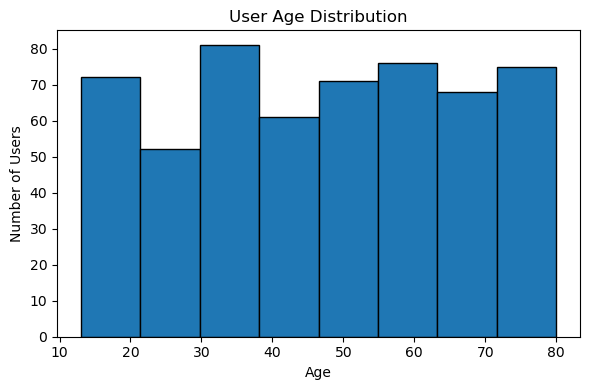

In [11]:
plt.figure(figsize=(6,4))
plt.hist(users["age"].dropna(), bins=8, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("User Age Distribution")
plt.tight_layout()
plt.show()


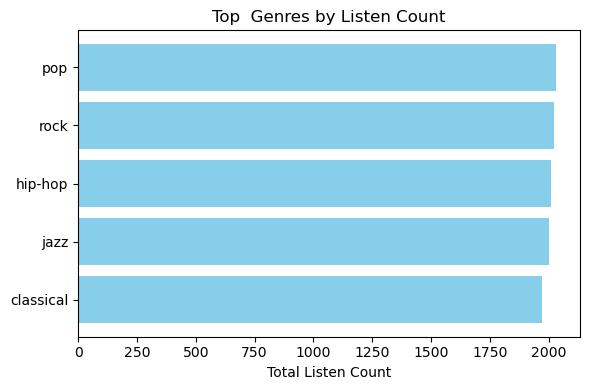

In [13]:
genre_totals = (user_genre_prefs
                .groupby("genre")["listen_count"]
                .sum()
                .sort_values(ascending=False)
                .head(10))

plt.figure(figsize=(6,4))
plt.barh(genre_totals.index[::-1], genre_totals.values[::-1], color="skyblue")
plt.xlabel("Total Listen Count")
plt.title("Top  Genres by Listen Count")
plt.tight_layout()
plt.show()


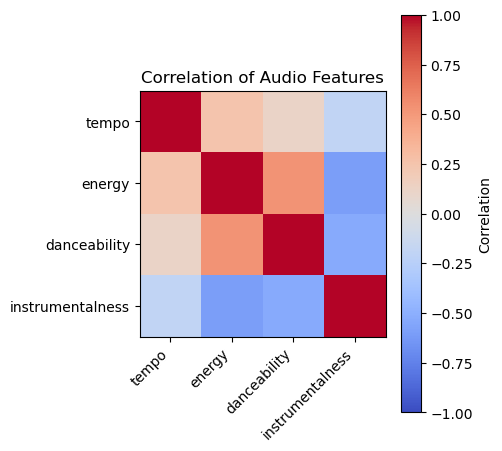

In [14]:
feat_cols = ["tempo","energy","danceability","instrumentalness"]
corr = songs[feat_cols].dropna().corr()

plt.figure(figsize=(5,5))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(len(feat_cols)), feat_cols, rotation=45, ha="right")
plt.yticks(range(len(feat_cols)), feat_cols)
plt.title("Correlation of Audio Features")
plt.tight_layout()
plt.show()


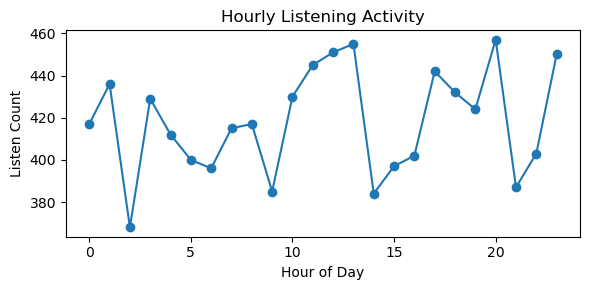

In [15]:
listening_history["hour"] = listening_history["listen_timestamp"].dt.hour
hourly = listening_history["hour"].value_counts().sort_index()

plt.figure(figsize=(6,3))
plt.plot(hourly.index, hourly.values, marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Listen Count")
plt.title("Hourly Listening Activity")
plt.tight_layout()
plt.show()


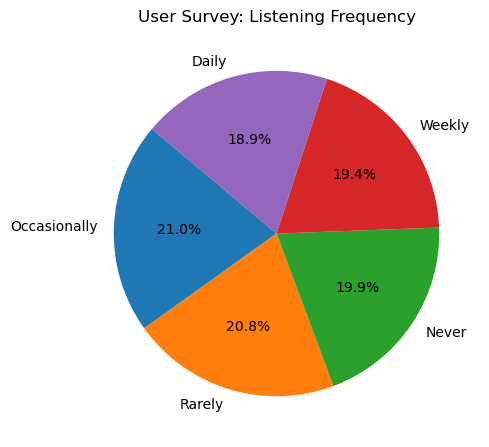

In [16]:
freq = user_surveys["listening_frequency"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(freq.values, labels=freq.index, autopct="%1.1f%%", startangle=140)
plt.title("User Survey: Listening Frequency")
plt.tight_layout()
plt.show()


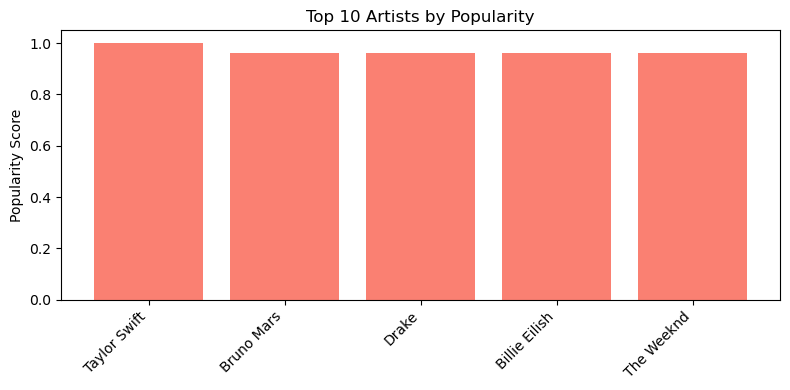

In [17]:
top_artists = artists.sort_values("popularity_score", ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(top_artists["name"], top_artists["popularity_score"], color="salmon")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Popularity Score")
plt.title("Top 10 Artists by Popularity")
plt.tight_layout()
plt.show()
